In [1]:
import random as rng

import imageio
import matplotlib.pyplot as plt
import numpy as np

from skimage import exposure
from skimage import filters
import cv2
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from signal_processing import (
    graphing,
    signal_transform,
    sigpro_utility,
)


/mnt/shared/code/damp_lab/beholder/.venv/lib/python3.8/site-packages/nd2reader/common_raw_metadata.py:99: RuntimeWarning: Reported average frame interval (227553.1 ms) doesn't match the set interval (300000.0 ms). Using the average now.
  warnings.warn(message % (avg_interval, interval), RuntimeWarning)
/mnt/shared/code/damp_lab/beholder/.venv/lib/python3.8/site-packages/nd2reader/common_raw_metadata.py:99: RuntimeWarning: Reported average frame interval (299769.0 ms) doesn't match the set interval (300000.0 ms). Using the average now.
  warnings.warn(message % (avg_interval, interval), RuntimeWarning)


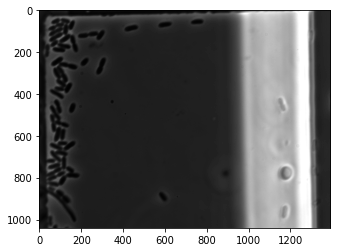

In [2]:
# Grab the initial greyscale frame.
input_path = '../data/raw_nd2/New_SR_1_5_MC_TS10h.nd2'
input_frame = sigpro_utility.get_initial_image_nd2(input_path)
graphing.plot_notebook(input_frame)

In [3]:
@interact(
    p1_x=widgets.IntSlider(min=0, max=input_frame.shape[1], value=input_frame.shape[0]/2),
    p1_y=widgets.IntSlider(min=0, max=input_frame.shape[0], value=input_frame.shape[1]/2),
    p2_x=widgets.IntSlider(min=0, max=input_frame.shape[1], value=input_frame.shape[0]/2),
    p2_y=widgets.IntSlider(min=0, max=input_frame.shape[0], value=input_frame.shape[1]/2),
)
def mask_selection(p1_x, p1_y, p2_x, p2_y):
    input_frame = sigpro_utility.get_initial_image_nd2(input_path)
    out_frame = cv2.circle(input_frame, (p1_x, p1_y), 20, 200, 3)
    out_frame = cv2.circle(out_frame, (p2_x, p2_y), 20, 100, 1)
    out_frame = cv2.rectangle(
                out_frame,
                (p1_x, p1_y),
                (p2_x, p2_y),
                255,
                5)
    graphing.plot_notebook(out_frame)

interactive(children=(IntSlider(value=520, description='p1_x', max=1392), IntSlider(value=696, description='p1…

In [4]:
@interact(
    p1_x=widgets.IntSlider(min=0, max=input_frame.shape[1], value=input_frame.shape[0]/2),
    p1_y=widgets.IntSlider(min=0, max=input_frame.shape[0], value=input_frame.shape[1]/2),
    p2_x=widgets.IntSlider(min=0, max=input_frame.shape[1], value=input_frame.shape[0]/2),
    p2_y=widgets.IntSlider(min=0, max=input_frame.shape[0], value=input_frame.shape[1]/2),
)
def swatch_selection(p1_x, p1_y, p2_x, p2_y):
    input_frame = sigpro_utility.get_initial_image_nd2(input_path)
    out_frame = cv2.circle(input_frame, (p1_x, p1_y), 20, 200, 3)
    out_frame = cv2.circle(out_frame, (p2_x, p2_y), 20, 100, 1)
    out_frame = cv2.rectangle(
                out_frame,
                (p1_x, p1_y),
                (p2_x, p2_y),
                255,
                5)
    graphing.plot_notebook(out_frame)


interactive(children=(IntSlider(value=520, description='p1_x', max=1392), IntSlider(value=696, description='p1…

In [13]:
def ghetto_submatrix_application(
        input_frame,
        point_one,
        point_two,
        value,
):
    x_0, x_1 = point_one[1], point_two[1]
    y_0, y_1 = point_one[0], point_two[0]
    for j in range(y_0, y_1):
        for i in range(x_0, x_1):
            input_frame[i][j] = input_frame[i][j] - value
    return input_frame

/mnt/shared/code/damp_lab/beholder/.venv/lib/python3.8/site-packages/nd2reader/common_raw_metadata.py:99: RuntimeWarning: Reported average frame interval (227553.1 ms) doesn't match the set interval (300000.0 ms). Using the average now.
  warnings.warn(message % (avg_interval, interval), RuntimeWarning)
/mnt/shared/code/damp_lab/beholder/.venv/lib/python3.8/site-packages/nd2reader/common_raw_metadata.py:99: RuntimeWarning: Reported average frame interval (299769.0 ms) doesn't match the set interval (300000.0 ms). Using the average now.
  warnings.warn(message % (avg_interval, interval), RuntimeWarning)


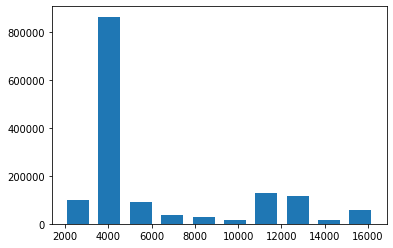

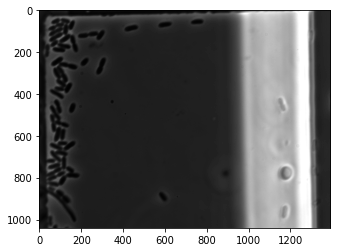

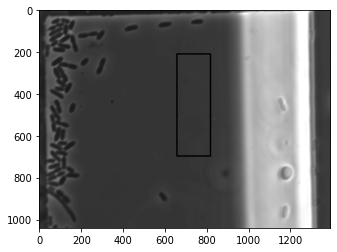

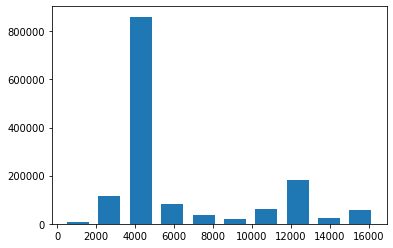

3592.0


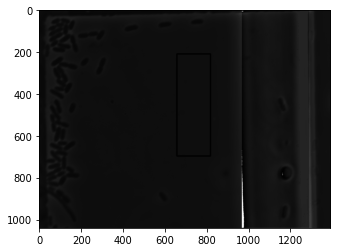

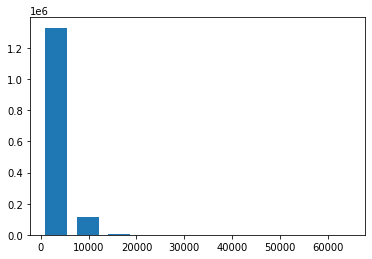

In [17]:
input_frame = sigpro_utility.get_initial_image_nd2(input_path)
graphing.plot_histogram(input_frame)
graphing.plot_notebook(input_frame)
swatch_point_1 = (657, 209)
swatch_point_2 = (817, 696)

mask_point_1 = (967, 0)
mask_point_2 = (1288, 1039)
out_frame = cv2.rectangle(
            input_frame,
            swatch_point_1,
            swatch_point_2,
            255,
            5)
graphing.plot_notebook(out_frame)
graphing.plot_histogram(out_frame)
calc_swatch_median = np.median(input_frame[
    swatch_point_1[0]:swatch_point_2[0],
    swatch_point_1[1]:swatch_point_2[1],
])
calc_mask_median = np.median(input_frame[
    mask_point_1[0]:mask_point_2[0],
    mask_point_1[1]:mask_point_2[1],
])
drop_value = abs(calc_swatch_median + calc_mask_median)
print(calc_swatch_median)
normalized_frame = ghetto_submatrix_application(input_frame, mask_point_1, mask_point_2, drop_value)
graphing.plot_notebook(normalized_frame)
graphing.plot_histogram(normalized_frame)